# Project description
Write something here

# Create new Conda environment (optional)
You can run with the following command in your conda terminal:
```bash
!conda env create -f environments.yaml
```
Or run the following cell to create a new conda environment.

In [1]:
# uncomment the following line to install the environment
# !conda env create -f environments.yaml
# !conda activate cv_term_project

# Install important packages

In [1]:
# check your Nvidia GPU
!nvidia-smi

Sun May 12 20:23:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080        On  | 00000000:01:00.0  On |                  N/A |
|  0%   41C    P8              19W / 340W |   3164MiB / 16376MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install PyTorch macthing with your CUDA version
You can check the compatible version of PyTorch with your CUDA version [here](https://pytorch.org/get-started/locally/)

In [3]:
# for my machine (RTX 3050 Laptop)
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
# check CUDA device
import torch
print(torch.__version__)
print(torch.cuda.get_device_name(0))

2.1.0+cu121
NVIDIA GeForce RTX 4080


### Other packages

In [4]:
# !pip install ipywidgets tqdm numpy matplotlib scikit-learn opencv-python pandas pillow kaggle ultralytics gdown PyYAML

In [5]:
import os
import shutil
import zipfile
import json
import random

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import cv2
import sklearn

In [6]:
# set random seed
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)

# Download dataset from Kaggle
Please put the kaggle.json into the same directory of this notebook

In [7]:
# check if the kaggle.json file exists
from sys import platform

# Windows
# C:\Users\<Windows-username>\.kaggle\kaggle.json
if platform == "win32":
    print("Windows")
    kaggle_json_path = os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json")
    if os.path.exists(kaggle_json_path):
        print("kaggle.json exists")
    else:
        print("kaggle.json does not exist")
        shutil.copy("./kaggle.json", kaggle_json_path)
        print("kaggle.json is copied to the directory")

# Linux
# ~/.kaggle/kaggle.json
elif platform == "linux" or platform == "linux2":
    print("Linux")
    kaggle_json_path = os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json")
    if os.path.exists(kaggle_json_path):
        print("kaggle.json exists")
    else:
        print("kaggle.json does not exist")
        os.makedirs(os.path.join(os.path.expanduser("~"), ".kaggle"), exist_ok=True)
        shutil.copy("./kaggle.json", kaggle_json_path)
        print("kaggle.json is copied to the directory")

# macOS
# ~/.kaggle/kaggle.json
elif platform == "darwin":
    print("macOS")
    kaggle_json_path = os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json")
    if os.path.exists(kaggle_json_path):
        print("kaggle.json exists")
    else:
        print("kaggle.json does not exist")
        os.makedirs(os.path.join(os.path.expanduser("~"), ".kaggle"), exist_ok=True)
        shutil.copy("./kaggle.json", kaggle_json_path)
        print("kaggle.json is copied to the directory")

Linux
kaggle.json exists


In [8]:
# download and unzip the dataset
if(os.path.exists("./rice-image-dataset-for-object-segmentation")):
    print("The dataset is already downloaded")
else:
    !kaggle datasets download -d alikhalilit98/rice-image-dataset-for-object-segmentation
    with zipfile.ZipFile("rice-image-dataset-for-object-segmentation.zip", 'r') as zip_ref:
        zip_ref.extractall("./rice-image-dataset-for-object-segmentation")

The dataset is already downloaded


# Data Preprocessing
The dataset is not appropriate for image segmentation because each image has a single object. We need to synthesize the dataset to have multiple objects in each image.

The current format of the label is in the "labelme" format. We need to convert them to the YOLO segmentation format.

./rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg/Arborio/Arborio (12575).jpg
255
(250, 250, 3)


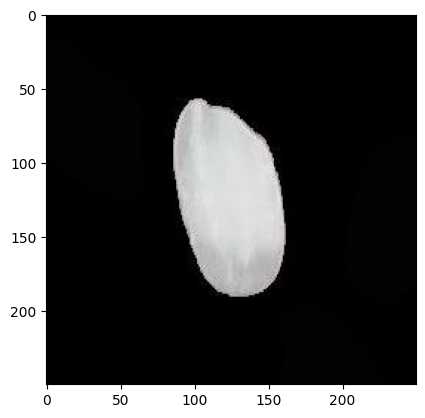

In [9]:
# let's take a look at the dataset
base_path = "./rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg"
type_list = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]
random_type_path = os.path.join(base_path, random.choice(type_list))
random_image_path = os.path.join(random_type_path, random.choice([f for f in os.listdir(random_type_path) if f.endswith(".jpg")]))

image = cv2.imread(random_image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
print(random_image_path)

print(np.max(image))
print(image.shape)

In [10]:
# label of the image
random_json_path = random_image_path.replace(".jpg", ".json")
with open(random_json_path) as f:
    data = json.load(f)
    display(data)

{'version': '5.0.2',
 'flags': {},
 'shapes': [{'label': 'Arborio',
   'points': [[100, 57],
    [99, 58],
    [97, 58],
    [97, 59],
    [93, 63],
    [93, 64],
    [91, 66],
    [91, 67],
    [90, 68],
    [90, 70],
    [89, 71],
    [89, 72],
    [88, 73],
    [88, 77],
    [87, 78],
    [87, 83],
    [86, 84],
    [86, 105],
    [87, 106],
    [87, 110],
    [88, 111],
    [88, 117],
    [89, 118],
    [89, 123],
    [90, 124],
    [90, 130],
    [91, 131],
    [91, 134],
    [92, 135],
    [92, 138],
    [93, 139],
    [93, 141],
    [94, 142],
    [94, 144],
    [95, 145],
    [95, 147],
    [96, 148],
    [96, 150],
    [97, 151],
    [97, 155],
    [98, 156],
    [98, 157],
    [99, 158],
    [99, 160],
    [100, 161],
    [100, 162],
    [101, 163],
    [101, 164],
    [102, 165],
    [102, 168],
    [104, 170],
    [104, 173],
    [107, 176],
    [107, 178],
    [114, 185],
    [115, 185],
    [116, 186],
    [116, 187],
    [117, 187],
    [118, 186],
    [119, 187],
    [1

## YOLO segmentation format

### The directory structure of the dataset should be as follows:
```bash
data
├── images
│   ├── train
│   │   ├── 0.jpg
│   │   ├── 1.jpg
│   │   ├── ...
│   ├── val
│   │   ├── 0.jpg
│   │   ├── 1.jpg
│   │   ├── ...
├── labels
│   ├── train
│   │   ├── 0.txt
│   │   ├── 1.txt
│   │   ├── ...
│   ├── val
│   │   ├── 0.txt
│   │   ├── 1.txt
│   │   ├── ...
```



### The format of the label files of YOLO segmentation should be as follows:
```bash
<cls-index> <x1> <y1> <x2> <y2> ... <xn> <yn>
<cls-index> <x1> <y1> <x2> <y2> ... <xn> <yn>
```
Where:
- `<cls-index>`: The index of the class in the class list.
- `<x1> <y1> <x2> <y2> ... <xn> <yn>`: The coordinates of the polygon, normalized by width and height of the image.

In [11]:
# get list of path of images of each type
base_path = "./rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg"
arborio_list = [f for f in os.listdir(os.path.join(base_path, "Arborio")) if f.endswith(".jpg")]
basmati_list = [f for f in os.listdir(os.path.join(base_path, "Basmati")) if f.endswith(".jpg")]
ipsala_list = [f for f in os.listdir(os.path.join(base_path, "Ipsala")) if f.endswith(".jpg")]
jasmine_list = [f for f in os.listdir(os.path.join(base_path, "Jasmine")) if f.endswith(".jpg")]
karacadag_list = [f for f in os.listdir(os.path.join(base_path, "Karacadag")) if f.endswith(".jpg")]

In [12]:
# print the number of images of each type
print("Arboria:", len(arborio_list))
print("Basmati:", len(basmati_list))
print("Ipsala:", len(ipsala_list))
print("Jasmine:", len(jasmine_list))
print("Karacadag:", len(karacadag_list))

Arboria: 15000
Basmati: 15000
Ipsala: 15000
Jasmine: 15000
Karacadag: 15000


In [14]:
'''# We will not use the entire dataset, since it is too large.
# We will use only 6000 images of jasmine and 1500 for the rest of the types.

random.seed(random_seed)

# random pick 6000 images from jasmine with random seed
jasmine_subset = random.sample(jasmine_list, 6000)
jasmine_subset = list(map(lambda x: f"Jasmine/{x}", jasmine_subset))

# random pick 1500 images from the rest of the types with random seed
arborio_subset = random.sample(arborio_list, 1500)
arborio_subset = list(map(lambda x: f"Arborio/{x}", arborio_subset))

basmati_subset = random.sample(basmati_list, 1500)
basmati_subset = list(map(lambda x: f"Basmati/{x}", basmati_subset))

ipsala_subset = random.Random(random_seed).sample(ipsala_list, 1500)
ipsala_subset = list(map(lambda x: f"Ipsala/{x}", ipsala_subset))

karacadag_subset = random.sample(karacadag_list, 1500)
karacadag_subset = list(map(lambda x: f"Karacadag/{x}", karacadag_subset))'''

'# We will not use the entire dataset, since it is too large.\n# We will use only 6000 images of jasmine and 1500 for the rest of the types.\n\nrandom.seed(random_seed)\n\n# random pick 6000 images from jasmine with random seed\njasmine_subset = random.sample(jasmine_list, 6000)\njasmine_subset = list(map(lambda x: f"Jasmine/{x}", jasmine_subset))\n\n# random pick 1500 images from the rest of the types with random seed\narborio_subset = random.sample(arborio_list, 1500)\narborio_subset = list(map(lambda x: f"Arborio/{x}", arborio_subset))\n\nbasmati_subset = random.sample(basmati_list, 1500)\nbasmati_subset = list(map(lambda x: f"Basmati/{x}", basmati_subset))\n\nipsala_subset = random.Random(random_seed).sample(ipsala_list, 1500)\nipsala_subset = list(map(lambda x: f"Ipsala/{x}", ipsala_subset))\n\nkaracadag_subset = random.sample(karacadag_list, 1500)\nkaracadag_subset = list(map(lambda x: f"Karacadag/{x}", karacadag_subset))'

In [15]:
'''# split the dataset into train and validation sets
from sklearn.model_selection import train_test_split

# Jasmine
jasmine_train, jasmine_val = train_test_split(jasmine_subset, test_size=0.1, random_state=random_seed)

# Non-Jasmine
arborio_train, arborio_val = train_test_split(arborio_subset, test_size=0.1, random_state=random_seed)
basmati_train, basmati_val = train_test_split(basmati_subset, test_size=0.1, random_state=random_seed)
ipsala_train, ipsala_val = train_test_split(ipsala_subset, test_size=0.1, random_state=random_seed)
karacadag_train, karacadag_val = train_test_split(karacadag_subset, test_size=0.1, random_state=random_seed)

non_jasmine_train = arborio_train + basmati_train + ipsala_train + karacadag_train
non_jasmine_val = arborio_val + basmati_val + ipsala_val + karacadag_val'''

'# split the dataset into train and validation sets\nfrom sklearn.model_selection import train_test_split\n\n# Jasmine\njasmine_train, jasmine_val = train_test_split(jasmine_subset, test_size=0.1, random_state=random_seed)\n\n# Non-Jasmine\narborio_train, arborio_val = train_test_split(arborio_subset, test_size=0.1, random_state=random_seed)\nbasmati_train, basmati_val = train_test_split(basmati_subset, test_size=0.1, random_state=random_seed)\nipsala_train, ipsala_val = train_test_split(ipsala_subset, test_size=0.1, random_state=random_seed)\nkaracadag_train, karacadag_val = train_test_split(karacadag_subset, test_size=0.1, random_state=random_seed)\n\nnon_jasmine_train = arborio_train + basmati_train + ipsala_train + karacadag_train\nnon_jasmine_val = arborio_val + basmati_val + ipsala_val + karacadag_val'

In [14]:
jasmine_subset = list(map(lambda x: f"Jasmine/{x}", jasmine_list))

arborio_subset = list(map(lambda x: f"Arborio/{x}", arborio_list))

basmati_subset = list(map(lambda x: f"Basmati/{x}", basmati_list))

ipsala_subset = list(map(lambda x: f"Ipsala/{x}", ipsala_list))

karacadag_subset = list(map(lambda x: f"Karacadag/{x}", karacadag_list))

In [15]:
# split the dataset into train and validation sets
from sklearn.model_selection import train_test_split

# Jasmine
jasmine_train, jasmine_val = train_test_split(jasmine_subset, test_size=0.2, random_state=random_seed)

# Non-Jasmine
arborio_train, arborio_val = train_test_split(arborio_subset, test_size=0.2, random_state=random_seed)
basmati_train, basmati_val = train_test_split(basmati_subset, test_size=0.2, random_state=random_seed)
ipsala_train, ipsala_val = train_test_split(ipsala_subset, test_size=0.2, random_state=random_seed)
karacadag_train, karacadag_val = train_test_split(karacadag_subset, test_size=0.2, random_state=random_seed)

non_jasmine_train = arborio_train[:3000] + basmati_train[:3000] + ipsala_train[:3000] + karacadag_train[:3000]
non_jasmine_val = arborio_val[:750] + basmati_val[:750] + ipsala_val[:750] + karacadag_val[:750]

In [16]:
print("Jasmine Train:", len(jasmine_train))
print("Jasmine Val:", len(jasmine_val))
print("Non-Jasmine Train:", len(non_jasmine_train))
print("Non-Jasmine Val:", len(non_jasmine_val))

Jasmine Train: 12000
Jasmine Val: 3000
Non-Jasmine Train: 12000
Non-Jasmine Val: 3000


## Synthesis data generation
Since the dataset is not appropriate for image segmentation, we need to synthesize the dataset to have multiple objects in each image.

### We will randomly generate the following parameters: 
Number of rice grains => [20, 30, 40, 50]

Ratio of Jasmine rice => [0.4, 0.5, 0.6, 0.7, 0.8]

Size of the image (we will resize each rice image to 125*125) => [(1080, 1080), (1024, 768), (1280, 720)] # square, 4:3, 16:9

Background color/texture => [black, dark gray, green, metal, wood]

In [18]:
# download texture
import gdown
# gdown.download_folder("https://drive.google.com/drive/folders/1rtXrai27tT2MA2vt8d4_dl7T94kkfnGT")

Retrieving folder contents


Processing file 12xWj-d2pQXXGMvuwLRpQQMqoYi_BksbY fabric1.jpg
Processing file 1kao4dbE27Vhh8iybyA_h_Mr3z-dZdCTh fabric2.jpg
Processing file 1oHO_8EyYDHh9iOVYW1CBaZ-eo8XdkzV6 marble1.jpg
Processing file 12F-A1DUJKmTzdAXdhtDR2wJMw5Y1cMIx marble2.jpg
Processing file 152tXCyPDsFrjCluGsbXda7nry6i7Uroo metal1.jpg
Processing file 13ecwU44XMnzG7SRV0bJX5AC4QIgLrw-G metal2.jpg
Processing file 1M6xv5wpJVl8fP4Q-uSUATymFZzhff4n9 wood1.jpg
Processing file 1vVgWAScXG7KIsHwhiIfsE-vr9unwh98q wood2.jpg


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=12xWj-d2pQXXGMvuwLRpQQMqoYi_BksbY
To: /home/andre/Desktop/ComputerVision_STA_Project/Texture/fabric1.jpg
100%|██████████| 24.4M/24.4M [00:02<00:00, 8.27MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kao4dbE27Vhh8iybyA_h_Mr3z-dZdCTh
To: /home/andre/Desktop/ComputerVision_STA_Project/Texture/fabric2.jpg
100%|██████████| 5.31M/5.31M [00:00<00:00, 6.41MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oHO_8EyYDHh9iOVYW1CBaZ-eo8XdkzV6
To: /home/andre/Desktop/ComputerVision_STA_Project/Texture/marble1.jpg
100%|██████████| 8.35M/8.35M [00:01<00:00, 6.44MB/s]
Downloading...
From: https://drive.google.com/uc?id=12F-A1DUJKmTzdAXdhtDR2wJMw5Y1cMIx
To: /home/andre/Desktop/ComputerVision_STA_Project/Texture/marble2.jpg
100%|██████████| 24.8M/24.8M [00:03<00:00, 8.18MB/s]
Downloading...
From: https://drive.google.com/uc?id=152

['/home/andre/Desktop/ComputerVision_STA_Project/Texture/fabric1.jpg',
 '/home/andre/Desktop/ComputerVision_STA_Project/Texture/fabric2.jpg',
 '/home/andre/Desktop/ComputerVision_STA_Project/Texture/marble1.jpg',
 '/home/andre/Desktop/ComputerVision_STA_Project/Texture/marble2.jpg',
 '/home/andre/Desktop/ComputerVision_STA_Project/Texture/metal1.jpg',
 '/home/andre/Desktop/ComputerVision_STA_Project/Texture/metal2.jpg',
 '/home/andre/Desktop/ComputerVision_STA_Project/Texture/wood1.jpg',
 '/home/andre/Desktop/ComputerVision_STA_Project/Texture/wood2.jpg']

In [20]:
from pathlib import Path
Path("./dataset").mkdir(parents=True, exist_ok=True)

Path("./dataset/images").mkdir(parents=True, exist_ok=True)
Path("./dataset/images/train").mkdir(parents=True, exist_ok=True)
Path("./dataset/images/val").mkdir(parents=True, exist_ok=True)

Path("./dataset/labels").mkdir(parents=True, exist_ok=True)
Path("./dataset/labels/train").mkdir(parents=True, exist_ok=True)
Path("./dataset/labels/val").mkdir(parents=True, exist_ok=True)

In [77]:
# shutil.rmtree("./dataset")

In [21]:
# synthesis parameters

number_of_syn_train_images = 2000
number_of_syn_val_images = 400
ratio_of_unlabeled = 0.05 # aka. background

syn_parameters = {
    "number_of_rice": [20, 30, 40, 50],
    "ratio_of_jasmine": [0.4, 0.5, 0.6, 0.7, 0.8],
    "size_of_image": [(1920, 1080), (1080, 1080), (1024, 768), (1280, 720)],
    "texture": ["black", "darkgray", "green", "darkgreen", "metal1", "metal2", "fabric1", "fabric2", "wood1", "wood2", "marble1", "marble2"],
    "effort": [25, 30, 35]
}

base_path = "./rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg"

In [22]:
from PIL import Image, ImageDraw
from tqdm import tqdm

def synthesisAndFormat(jasmine_dataset, non_jasmine_dataset, dataset_type, number_of_syn_images):
    if dataset_type not in ["train", "val"]:
        raise ValueError("dataset_type must be either 'train' or 'val'")
    
    random.seed(random_seed)
    
    for i in tqdm(range(int(np.ceil(number_of_syn_images*(1+ratio_of_unlabeled)))), desc=f"{dataset_type} dataset progress"):
        # random the parameters
        number_of_rice = random.choice(syn_parameters["number_of_rice"])
        ratio_of_jasmine = random.choice(syn_parameters["ratio_of_jasmine"])
        size_of_image = random.choice(syn_parameters["size_of_image"])
        texture = random.choice(syn_parameters["texture"])
        effort = random.choice(syn_parameters["effort"])
        # print(number_of_rice, ratio_of_jasmine, size_of_image, texture)

        # get/generate the background
        if texture not in ["black", "darkgray", "green", "darkgreen"]:
            texture_path = f"./Texture/{texture}.jpg"
            background = Image.open(texture_path).resize(size_of_image)
        else:
            background = Image.new("RGB", size_of_image, color=texture)
        
        # set the save path
        img_save_path = f"./dataset/images/{dataset_type}/syn_{i}.jpg"
        label_save_path = f"./dataset/labels/{dataset_type}/syn_{i}.txt"
        
        # add background images and empty labels (this might help to reduce False Positive)
        if i >= number_of_syn_images:
            background.save(img_save_path)
            # create an empty label file
            with open(label_save_path, "w") as label_file:
                pass
            continue
        
        background, lines = drawRiceOnBG(number_of_rice, ratio_of_jasmine, size_of_image, background, jasmine_dataset, non_jasmine_dataset, effort)
        
        # save the image and label
        background.save(img_save_path)
        with open(label_save_path, "w") as label_file:
            label_file.writelines("\n".join(lines))

def drawRiceOnBG(number_of_rice, ratio_of_jasmine, size_of_image, background, jasmine_dataset, non_jasmine_dataset, effort):
    # randomly pick jasmine and non-jasmine rices
    number_of_jasmine = int(number_of_rice * ratio_of_jasmine)
    number_of_non_jasmine = number_of_rice - number_of_jasmine
    
    picked_jasmine = random.sample(jasmine_dataset, number_of_jasmine)
    picked_non_jasmine = random.sample(non_jasmine_dataset, number_of_non_jasmine)
    
    lines = [] # store the lines of the label file
    occupied_areas = [] # store the areas where objects have been placed
    
    # paste the rice images to the background
    for image_name in picked_jasmine + picked_non_jasmine:
        image_path = f"{base_path}/{image_name}"
        json_path = image_path.replace(".jpg", ".json")
        
        rice_image = Image.open(image_path).resize((125, 125)) # original image is (250, 250)
        with open(json_path) as json_file:
            data = json.load(json_file)
            points = data["shapes"][0]["points"]
            label = 0 if data["shapes"][0]["label"] == "Jasmine" else 1 # 0 for Jasmine, 1 for the rest
            
        resized_points = [(point[0]//2, point[1]//2) for point in points]
        
        # Create a new image with the same size as the original image, filled with black
        mask = Image.new('L', (125, 125), 0)

        # Draw the polygon defined by `resized_points` onto `mask` in white
        ImageDraw.Draw(mask).polygon(resized_points, outline=1, fill=1)
        
        # Convert the mask to a NumPy array and scale it to the range [0, 255]
        mask_np = np.array(mask) * 255
        
        # Use the mask to extract the segmented area from the original image
        segmented_area = Image.fromarray(np.array(rice_image) * (mask_np[:, :, None] / 255).astype('uint8'))
        
        # Try to find a spot to paste the segmented area to the background
        checker = False 
        for _ in range(effort): # try 20 times
            random_coor = (random.randint(0, size_of_image[0]-125), random.randint(0, size_of_image[1]-125))
            area = (random_coor[0], random_coor[1], random_coor[0]+125, random_coor[1]+125)
            
            if not any(intersects(area, existing_area) for existing_area in occupied_areas):
                # If the area does not overlap with any existing areas, paste the segmented area and break the loop
                background.paste(segmented_area, random_coor, mask=Image.fromarray(mask_np))
                occupied_areas.append(area)
                checker = True
                break
            
        if not checker:
            # If we couldn't find a spot after 20 attempts, stop adding objects to the image
            random_coor = (random.randint(0, size_of_image[0]-125), random.randint(0, size_of_image[1]-125))
            background.paste(segmented_area, random_coor, mask=Image.fromarray(mask_np))
        
        # append the label to the lines
        line = f"{label}"
        for point in resized_points:
            x = round((point[0] + random_coor[0]) / size_of_image[0], 4)
            y = round((point[1] + random_coor[1]) / size_of_image[1], 4)
            line += f" {x} {y}"
        lines.append(line)
    
    return background, lines

# intersect method for the area
def intersects(tup1, tup2):
    return not (tup1[2] < tup2[0] or tup1[0] > tup2[2] or tup1[3] < tup2[1] or tup1[1] > tup2[3])

In [23]:
import concurrent.futures

with concurrent.futures.ThreadPoolExecutor() as executor:
    future1 = executor.submit(synthesisAndFormat, jasmine_train, non_jasmine_train, "train", number_of_syn_train_images)
    future2 = executor.submit(synthesisAndFormat, jasmine_val, non_jasmine_val, "val", number_of_syn_val_images)

train dataset progress: 100%|██████████| 2100/2100 [07:14<00:00,  4.83it/s]


In [25]:
print("number of train images", len(os.listdir("./dataset/images/train")))
print("number of train labels", len(os.listdir("./dataset/labels/train")))
print("number of val images", len(os.listdir("./dataset/images/val")))
print("number of val labels", len(os.listdir("./dataset/labels/val")))

number of train images 2100
number of train labels 2100
number of val images 420
number of val labels 420


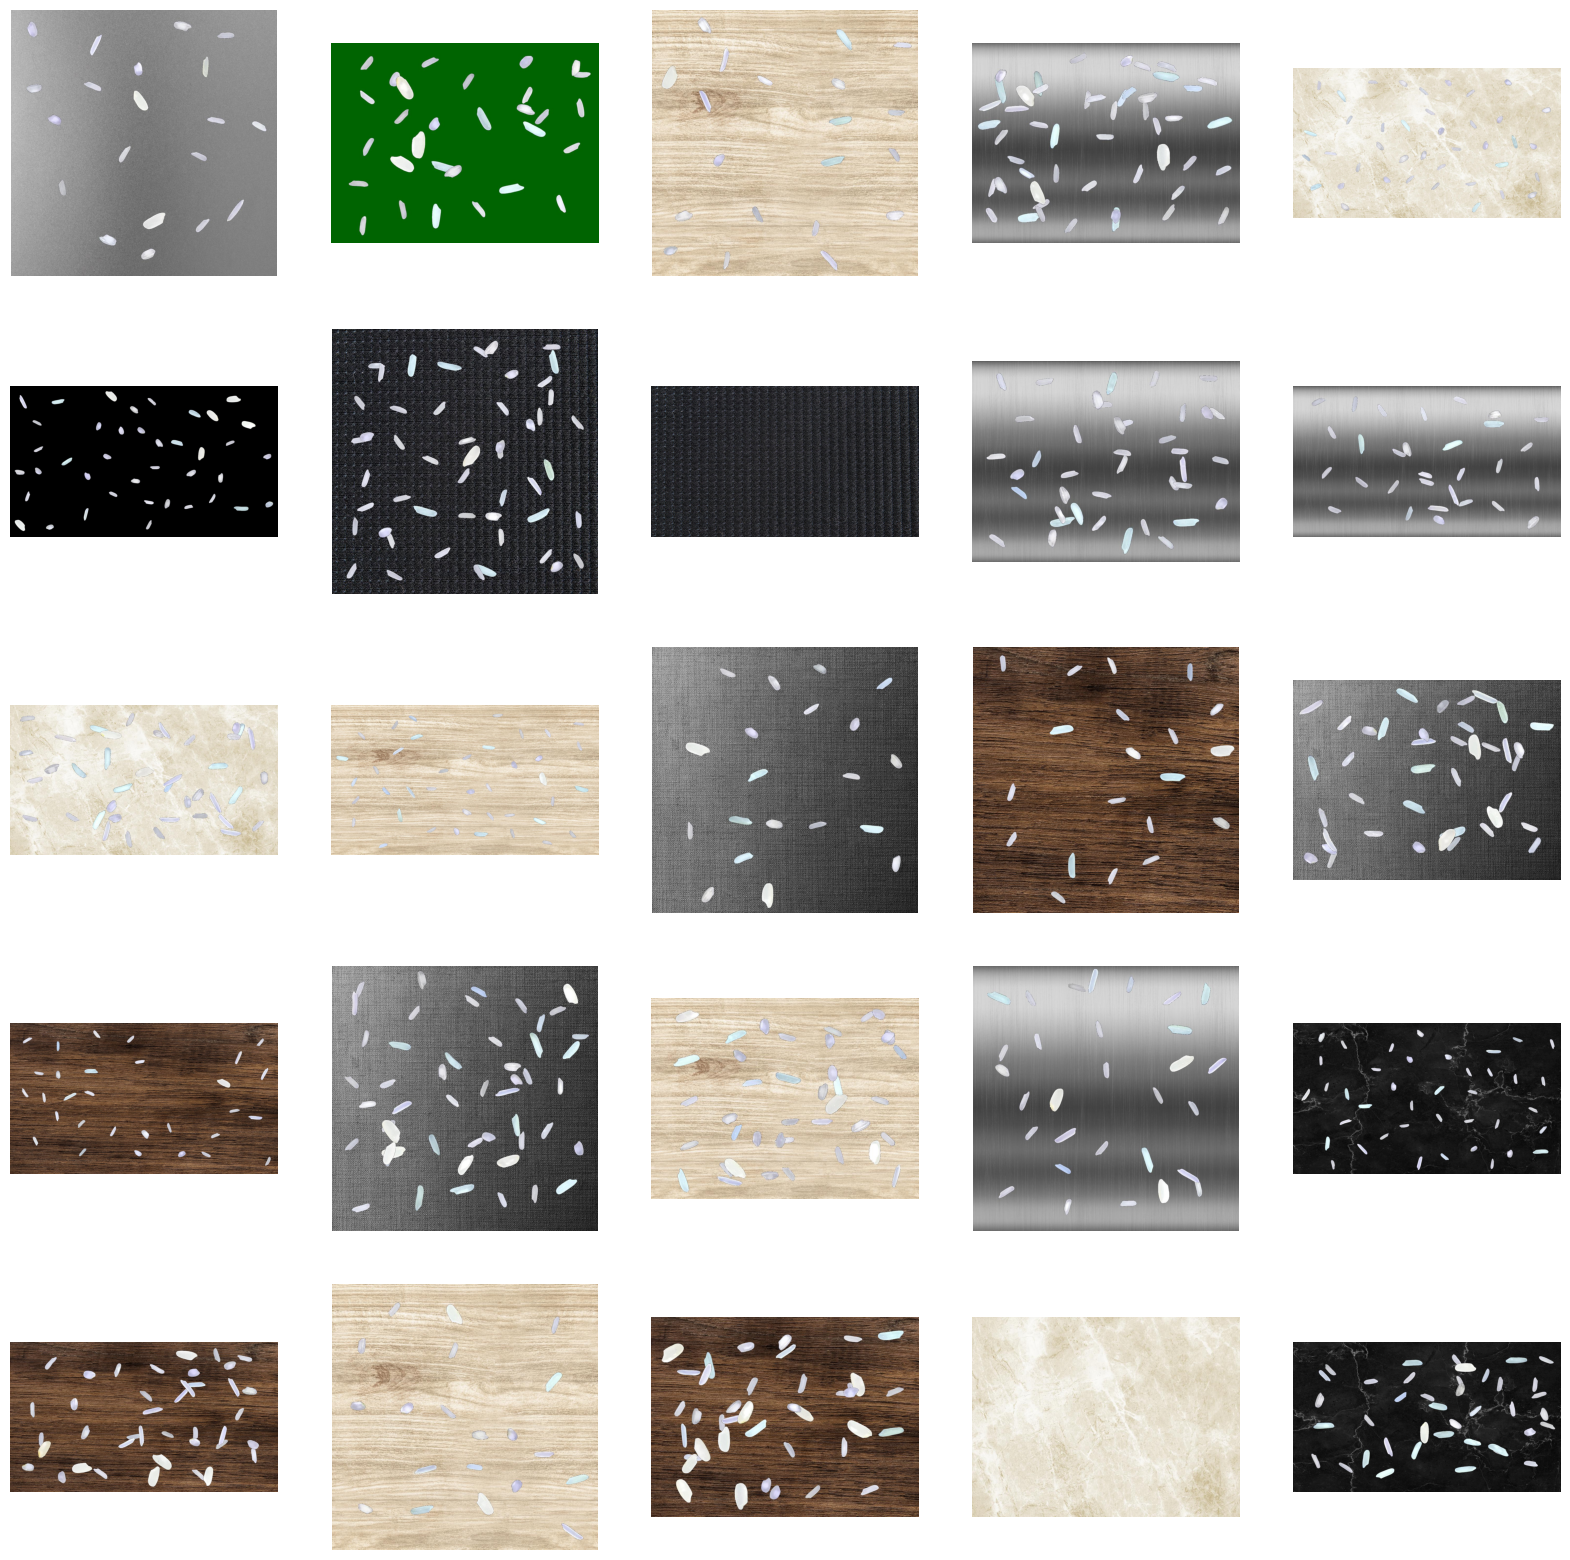

In [26]:
# let's take a look at the synthesized images
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.ravel()
syn_image_path = os.listdir("./dataset/images/train")
sample_syn_image = random.sample(syn_image_path, 25)
for i in range(25):
    random_image = cv2.imread(f"./dataset/images/train/{sample_syn_image[i]}")
    random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(random_image)
    axes[i].axis("off")
plt.show()

### The format of the yaml file should be as follows:
```bash
# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco8-seg  # dataset root dir
train: images/train  # train images (relative to 'path') 4 images
val: images/val  # val images (relative to 'path') 4 images
test:  # test images (optional)

# Classes (80 COCO classes)
names:
  0: person
  1: bicycle
  2: car
  # ...
  77: teddy bear
  78: hair drier
  79: toothbrush
```

[source](https://docs.ultralytics.com/datasets/segment/#ultralytics-yolo-format)

In [27]:
import yaml

full_path = os.path.abspath("dataset")

yaml_data = dict(
    path = full_path,
    train = "images/train",
    val = "images/val",
    names = [{0: "Jasmine"}, {1: "Non-Jasmine"}]
)

with open("dataset/data.yaml", "w") as f:
    yaml.dump(yaml_data, f, default_flow_style=False, sort_keys=False)

# Training YOLO Segmentation model

In [1]:
epochs = 150
# batch = 2
# imgsz = 1088

batch = 1
imgsz = 1536

# set random seed
import random
import numpy as np
import torch
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)

In [2]:
from ultralytics import YOLO
import os

# run1 x150-b2-1088

seg_model = YOLO("yolov8x-seg.pt")

yaml_full_path = full_path = os.path.abspath("./dataset/data.yaml")
config = {
    "data": yaml_full_path,
    "epochs": epochs,
    "batch": batch,
    "imgsz": imgsz,
    "device": "0",
    "project": "rice_segmentation_new",
    "name": "run1",
    "seed": random_seed,
    "workers": 32,
    "cache": True,
}
trained_seg_model = seg_model.train(**config)

New https://pypi.org/project/ultralytics/8.2.13 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.37 🚀 Python-3.11.8 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16071MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/home/andre/Desktop/ComputerVision_STA_Project/dataset/data.yaml, epochs=150, time=None, patience=100, batch=2, imgsz=1088, save=True, save_period=-1, cache=True, device=0, workers=32, project=rice_segmentation_new, name=run1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=

train: Scanning /home/andre/Desktop/ComputerVision_STA_Project/dataset/labels/train.cache... 2100 images, 100 backgrounds, 0 corrupt: 100%|██████████| 2100/2100 [00:00<?, ?it/s]
train: Caching images (5.0GB True): 100%|██████████| 2100/2100 [00:01<00:00, 1268.48it/s]
val: Scanning /home/andre/Desktop/ComputerVision_STA_Project/dataset/labels/val.cache... 420 images, 20 backgrounds, 0 corrupt: 100%|██████████| 420/420 [00:00<?, ?it/s]
val: Caching images (1.0GB True): 100%|██████████| 420/420 [00:01<00:00, 252.00it/s]


Plotting labels to rice_segmentation_new/run1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1088 train, 1088 val
Using 24 dataloader workers
Logging results to rice_segmentation_new/run1
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      11.1G     0.4219     0.5921     0.4705     0.8174        181       1088: 100%|██████████| 1050/1050 [03:31<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.68it/s]

                   all        420      13990       0.98      0.976      0.992      0.944      0.977      0.972       0.99      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150        11G     0.4267     0.5579     0.3503     0.8175        183       1088: 100%|██████████| 1050/1050 [03:27<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.82it/s]

                   all        420      13990      0.981      0.976      0.992      0.912      0.978      0.972       0.99      0.811



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      11.6G     0.4158     0.5294     0.3246     0.8137         62       1088: 100%|██████████| 1050/1050 [03:26<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.83it/s]

                   all        420      13990      0.986      0.982      0.994      0.949      0.983      0.977      0.991      0.826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      11.1G     0.3922     0.5046     0.3191     0.8079         85       1088: 100%|██████████| 1050/1050 [03:26<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.92it/s]

                   all        420      13990      0.988      0.984      0.994      0.955      0.987       0.98      0.993      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      11.5G     0.3988     0.4925     0.3032      0.811         35       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.03it/s]

                   all        420      13990      0.987      0.984      0.994      0.932      0.985       0.98      0.992      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      12.5G     0.3797     0.4817     0.2773     0.8063        160       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.12it/s]

                   all        420      13990      0.988      0.989      0.994      0.959      0.986      0.984      0.993       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      11.1G     0.3794     0.4799     0.2787     0.8059        129       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.99it/s]

                   all        420      13990      0.992      0.988      0.994      0.949       0.99      0.985      0.992       0.82



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      10.9G      0.365     0.4554     0.2638     0.8025        112       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.97it/s]

                   all        420      13990      0.992       0.99      0.995      0.953      0.989      0.987      0.994      0.827



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      11.1G     0.3676     0.4577     0.2554     0.8022        166       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.05it/s]

                   all        420      13990      0.992      0.989      0.994      0.969       0.99      0.987      0.994      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      11.4G     0.3539     0.4473     0.2517     0.7985         64       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.84it/s]

                   all        420      13990      0.991      0.988      0.994      0.956      0.989      0.986      0.994       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      10.9G     0.3515     0.4438      0.248     0.7988         97       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.96it/s]

                   all        420      13990      0.993      0.987      0.994      0.964       0.99      0.985      0.992      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150        12G     0.3499     0.4375     0.2492     0.7975         67       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.98it/s]

                   all        420      13990      0.985      0.989      0.994      0.955      0.982      0.985      0.992      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      11.1G     0.3461     0.4441     0.2484     0.7972        112       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.80it/s]

                   all        420      13990      0.991      0.989      0.994      0.964      0.988      0.986      0.993      0.836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150        11G     0.3443     0.4369     0.2423      0.798         61       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.93it/s]

                   all        420      13990      0.993      0.991      0.994      0.959       0.99      0.988      0.994      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      11.3G     0.3389     0.4331     0.2354     0.7966         91       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.06it/s]

                   all        420      13990      0.995      0.991      0.994       0.97      0.993      0.989      0.994      0.849



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150        12G     0.3393     0.4247     0.2341     0.7971        113       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.88it/s]

                   all        420      13990      0.993      0.992      0.994       0.97       0.99      0.987      0.993      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      11.7G     0.3359     0.4256     0.2345     0.7952        125       1088: 100%|██████████| 1050/1050 [03:26<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.99it/s]

                   all        420      13990      0.993      0.992      0.994      0.969       0.99      0.989      0.993      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      10.3G     0.3369     0.4165     0.2283     0.7947         45       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.02it/s]

                   all        420      13990      0.993       0.99      0.994      0.969       0.99      0.988      0.993       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      11.2G     0.3287     0.4101     0.2247     0.7948        102       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.91it/s]

                   all        420      13990      0.993      0.993      0.995      0.969      0.992       0.99      0.994      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150        11G      0.322     0.3992     0.2196     0.7939        135       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.85it/s]

                   all        420      13990      0.993      0.991      0.994      0.969       0.99      0.989      0.994       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150        12G     0.3235     0.3992     0.2208     0.7935        163       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.02it/s]

                   all        420      13990      0.993      0.993      0.994      0.975      0.993      0.989      0.994      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      10.8G     0.3165     0.3939     0.2178      0.793        143       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.91it/s]

                   all        420      13990      0.994      0.993      0.995      0.971      0.992      0.991      0.994      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      12.1G     0.3158     0.3929     0.2191     0.7928         63       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.84it/s]

                   all        420      13990      0.993      0.993      0.994      0.975      0.991      0.991      0.994      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150        11G     0.3128     0.3941       0.22     0.7922         61       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.96it/s]

                   all        420      13990      0.993      0.992      0.994      0.969      0.991      0.989      0.994      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150        11G     0.3161     0.3949      0.217     0.7922         51       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.81it/s]

                   all        420      13990      0.993      0.992      0.994      0.977      0.991       0.99      0.994      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      11.9G     0.3138     0.3882     0.2152      0.792        115       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.93it/s]

                   all        420      13990      0.993      0.993      0.995       0.97      0.992      0.989      0.994      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      10.9G     0.3179     0.3915     0.2171     0.7917         40       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.03it/s]

                   all        420      13990      0.994      0.991      0.994      0.974      0.989       0.99      0.994      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      10.7G     0.3185     0.3912     0.2168     0.7913        133       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.96it/s]

                   all        420      13990      0.992      0.992      0.994      0.968      0.989      0.989      0.994      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      12.3G     0.3125     0.3817     0.2073     0.7901        109       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.04it/s]

                   all        420      13990      0.994      0.992      0.994       0.97      0.992      0.989      0.994      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      12.3G     0.3069     0.3858     0.2105     0.7909        113       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.87it/s]

                   all        420      13990      0.994      0.993      0.994      0.963      0.992       0.99      0.994      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      11.9G     0.3101       0.38     0.2112     0.7907         91       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.04it/s]

                   all        420      13990      0.994      0.994      0.995      0.972      0.993      0.991      0.994      0.849



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      12.8G      0.303      0.377     0.2102       0.79         75       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.08it/s]

                   all        420      13990      0.993      0.994      0.994      0.976      0.994       0.99      0.994      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150        11G     0.2961     0.3701     0.2013     0.7893        127       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.92it/s]

                   all        420      13990      0.996      0.992      0.995      0.976      0.993       0.99      0.993      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150        11G     0.2988     0.3751     0.2057     0.7895        119       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.89it/s]

                   all        420      13990      0.994      0.991      0.995      0.974      0.992      0.989      0.994      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      11.6G        0.3     0.3782     0.2044     0.7905        121       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.99it/s]

                   all        420      13990      0.995      0.992      0.994      0.975      0.993       0.99      0.994       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      11.7G     0.2985     0.3671      0.201     0.7883         57       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.02it/s]

                   all        420      13990      0.994      0.993      0.994      0.971      0.992      0.991      0.994      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      12.2G     0.2968      0.364     0.1983     0.7886         77       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.99it/s]

                   all        420      13990      0.994      0.993      0.994      0.972      0.992      0.991      0.994      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      10.4G      0.295     0.3615     0.1956     0.7884         38       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.94it/s]

                   all        420      13990      0.995      0.994      0.995      0.973      0.992      0.992      0.994      0.854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      12.6G      0.301     0.3671     0.2006     0.7886        123       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.92it/s]

                   all        420      13990      0.993       0.99      0.994      0.979      0.991      0.988      0.994      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150        11G     0.2875      0.351     0.1949     0.7877         41       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.02it/s]

                   all        420      13990      0.994      0.993      0.994      0.973      0.987      0.987      0.993      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150        13G     0.2907     0.3564     0.1989     0.7876        133       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.87it/s]

                   all        420      13990      0.995      0.993      0.995      0.977      0.993      0.991      0.994      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150        11G     0.2887     0.3514     0.1997     0.7863        121       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.02it/s]

                   all        420      13990      0.993      0.992      0.994      0.972      0.992      0.988      0.993      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      10.8G      0.287     0.3538     0.1935      0.787        204       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.01it/s]

                   all        420      13990      0.995      0.995      0.995      0.975      0.992      0.993      0.994       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      12.3G     0.2793     0.3398     0.1899     0.7851        110       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.93it/s]

                   all        420      13990      0.994      0.994      0.994      0.982      0.992      0.991      0.994      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      11.6G     0.2826     0.3365     0.1899     0.7854         86       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.98it/s]

                   all        420      13990      0.995      0.993      0.994      0.978      0.994      0.991      0.994      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      12.9G     0.2826     0.3416     0.1886     0.7874         81       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.96it/s]

                   all        420      13990      0.995      0.991      0.994      0.978      0.992      0.988      0.993      0.859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      11.2G     0.2737     0.3344     0.1833     0.7839        113       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.89it/s]

                   all        420      13990      0.995      0.993      0.994      0.977      0.993      0.991      0.994      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      11.3G      0.275      0.339     0.1875     0.7855         51       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.02it/s]

                   all        420      13990      0.995      0.994      0.994      0.979      0.993      0.991      0.994      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      11.1G      0.276     0.3315     0.1835     0.7837        164       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.00it/s]

                   all        420      13990      0.996      0.995      0.994       0.98      0.994      0.993      0.994      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      11.1G     0.2756     0.3359     0.1853      0.785        124       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.92it/s]

                   all        420      13990      0.997      0.995      0.995      0.982      0.995      0.993      0.994      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      11.6G     0.2744     0.3296      0.183     0.7858        109       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.98it/s]

                   all        420      13990      0.996      0.994      0.995       0.98      0.993      0.992      0.994      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      11.5G     0.2719     0.3259     0.1842     0.7854        161       1088: 100%|██████████| 1050/1050 [03:22<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.92it/s]

                   all        420      13990      0.995      0.993      0.995      0.976      0.993      0.991      0.994      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      11.9G     0.2721       0.33     0.1831     0.7824         60       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.74it/s]

                   all        420      13990      0.996      0.995      0.994      0.979      0.994      0.993      0.994      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      11.4G     0.2681     0.3248     0.1778     0.7831        173       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.99it/s]

                   all        420      13990      0.993      0.993      0.995       0.98      0.992       0.99      0.994      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150        12G     0.2768     0.3292     0.1856     0.7845        139       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.99it/s]

                   all        420      13990      0.995      0.995      0.995      0.981      0.993      0.993      0.994      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      11.4G     0.2665      0.321     0.1785     0.7838        139       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.01it/s]

                   all        420      13990      0.995      0.994      0.995       0.98      0.992      0.992      0.994      0.863



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      11.5G     0.2655     0.3187     0.1777     0.7825        102       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.94it/s]

                   all        420      13990      0.996      0.994      0.994      0.979      0.994      0.992      0.994      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      12.4G     0.2626     0.3171     0.1755     0.7829         26       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.04it/s]

                   all        420      13990      0.993      0.994      0.995      0.977      0.993       0.99      0.994      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      12.1G     0.2669     0.3194     0.1772     0.7821         63       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.86it/s]

                   all        420      13990      0.995      0.994      0.994      0.981      0.992      0.993      0.994      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      11.4G     0.2635     0.3165     0.1762     0.7823        134       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.92it/s]

                   all        420      13990      0.996      0.995      0.995      0.981      0.994      0.992      0.994       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      11.1G     0.2652     0.3222     0.1771     0.7843        124       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.92it/s]

                   all        420      13990      0.995      0.994      0.994      0.983      0.993      0.992      0.994      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      11.7G     0.2615     0.3116     0.1729     0.7818         50       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.02it/s]

                   all        420      13990      0.995      0.994      0.994      0.979      0.993      0.991      0.994      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      11.7G     0.2614     0.3122     0.1777     0.7825        134       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.01it/s]

                   all        420      13990      0.995      0.994      0.994      0.981      0.992      0.992      0.994       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150      12.4G     0.2619     0.3082     0.1742     0.7819         78       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.10it/s]

                   all        420      13990      0.995      0.994      0.994      0.979      0.993      0.992      0.994      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      12.9G     0.2609     0.3105     0.1718     0.7809        106       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.98it/s]

                   all        420      13990      0.996      0.996      0.994      0.983      0.994      0.993      0.994      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      10.8G     0.2638     0.3156     0.1751     0.7826        174       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.85it/s]

                   all        420      13990      0.994      0.993      0.994      0.982      0.992      0.991      0.994      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      11.6G     0.2587     0.3103     0.1698     0.7814         57       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.99it/s]

                   all        420      13990      0.995      0.994      0.995      0.979      0.993      0.992      0.994      0.859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      11.8G     0.2628     0.3158     0.1693     0.7829        104       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.03it/s]

                   all        420      13990      0.996      0.995      0.995      0.981      0.994      0.993      0.994      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      11.1G     0.2585     0.3051     0.1698      0.782         65       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.94it/s]

                   all        420      13990      0.996      0.995      0.995      0.981      0.994      0.993      0.994      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      12.7G     0.2597     0.3106     0.1686     0.7817         52       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.05it/s]

                   all        420      13990      0.997      0.995      0.994      0.982      0.995      0.992      0.994      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      11.7G     0.2585     0.3044     0.1681     0.7811         69       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.99it/s]

                   all        420      13990      0.995      0.994      0.995       0.98      0.993      0.991      0.994      0.863



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      12.1G     0.2591     0.3039     0.1708     0.7808        128       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.00it/s]

                   all        420      13990      0.996      0.995      0.995      0.982      0.995      0.992      0.994      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      12.3G     0.2532     0.2981     0.1655     0.7811         86       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.88it/s]

                   all        420      13990      0.997      0.994      0.994       0.98      0.995      0.992      0.994      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      11.3G     0.2563     0.2996     0.1669     0.7799        109       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.95it/s]

                   all        420      13990      0.996      0.995      0.995      0.983      0.994      0.991      0.994      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      12.6G      0.252     0.2993     0.1653     0.7804         97       1088: 100%|██████████| 1050/1050 [03:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00, 10.08it/s]

                   all        420      13990      0.996      0.994      0.995      0.982      0.995      0.992      0.994      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      10.9G     0.2547     0.2988     0.1675     0.7806         95       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.97it/s]

                   all        420      13990      0.997      0.994      0.995      0.982      0.995      0.992      0.994      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150        12G     0.2554     0.3015     0.1677     0.7811        116       1088: 100%|██████████| 1050/1050 [03:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.97it/s]

                   all        420      13990      0.996      0.995      0.994       0.98      0.994      0.994      0.994      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      12.7G     0.2515     0.3002     0.1634     0.7803        117       1088: 100%|██████████| 1050/1050 [03:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:10<00:00,  9.88it/s]

                   all        420      13990      0.995      0.995      0.995      0.981      0.993      0.993      0.994      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      11.7G     0.2495     0.2951     0.1622     0.7802        132       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.996      0.996      0.995       0.98      0.995      0.994      0.995      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150      12.4G     0.2484     0.2932     0.1613     0.7801        115       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.995      0.995      0.995      0.982      0.992      0.992      0.994      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      12.7G     0.2478     0.2943     0.1609     0.7788         66       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.994      0.994      0.983      0.995      0.991      0.994      0.865



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      11.6G     0.2485     0.2927     0.1621     0.7793         36       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.994      0.994      0.994      0.984      0.994       0.99      0.994      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      11.4G     0.2479      0.294     0.1601     0.7797         93       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.996      0.993      0.995      0.981      0.994      0.991      0.994      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150        12G     0.2492      0.293     0.1606     0.7795         52       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.994      0.995      0.983      0.994      0.992      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      10.6G      0.247      0.289     0.1578      0.779         93       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.996      0.995      0.984      0.994      0.994      0.994      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150        12G     0.2448     0.2898      0.158       0.78        166       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.995      0.995      0.995      0.982      0.995      0.991      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150      12.8G     0.2452     0.2895     0.1584     0.7795         70       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.82it/s]

                   all        420      13990      0.996      0.995      0.995      0.982      0.995      0.992      0.994      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      12.4G     0.2485     0.2908     0.1573     0.7794         83       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.995      0.996      0.995      0.982      0.994      0.991      0.994      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150      11.1G     0.2429     0.2845     0.1558     0.7785         47       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.82it/s]

                   all        420      13990      0.996      0.994      0.995      0.983      0.995      0.992      0.994      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150      11.4G     0.2468     0.2884     0.1586     0.7784         56       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.995      0.995      0.981      0.995      0.993      0.994      0.863



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150      11.5G     0.2418     0.2826     0.1554     0.7785         54       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.81it/s]

                   all        420      13990      0.997      0.995      0.995      0.981      0.995      0.993      0.994      0.859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      11.2G     0.2422     0.2869     0.1574      0.779         51       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.995      0.995      0.982      0.995      0.992      0.994      0.865



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150        12G      0.244     0.2878     0.1578      0.779        112       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.82it/s]

                   all        420      13990      0.996      0.995      0.995      0.982      0.993      0.993      0.994      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150        13G     0.2429     0.2843     0.1558     0.7792         93       1088: 100%|██████████| 1050/1050 [03:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.994      0.994      0.982      0.994      0.991      0.994      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150      11.6G     0.2443     0.2876     0.1543     0.7784         80       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.994      0.995      0.982      0.995      0.992      0.994      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      12.7G     0.2413     0.2826     0.1548     0.7773         76       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.996      0.996      0.995      0.984      0.993      0.993      0.994      0.876



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150      11.6G     0.2396     0.2776     0.1539     0.7772        257       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.82it/s]

                   all        420      13990      0.996      0.994      0.995      0.984      0.992      0.994      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150      11.1G     0.2374     0.2775     0.1504     0.7782         74       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.994      0.995      0.984      0.994      0.993      0.994      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150      11.7G     0.2365     0.2756     0.1496     0.7769         86       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.995      0.995      0.983      0.995      0.993      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      11.5G     0.2349      0.276     0.1512     0.7776        145       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.997      0.996      0.995      0.983      0.995      0.994      0.995      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      11.6G     0.2361     0.2737     0.1505     0.7768         44       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.995      0.995      0.983      0.995      0.993      0.994      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      10.8G     0.2378     0.2724     0.1495      0.777         82       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.80it/s]

                   all        420      13990      0.997      0.995      0.995      0.983      0.996      0.993      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      12.1G     0.2365     0.2738     0.1495     0.7771         80       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.995      0.996      0.995      0.983      0.994      0.993      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      11.4G     0.2387     0.2737     0.1506     0.7771         49       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.996      0.995      0.995      0.984      0.994      0.993      0.994      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      10.8G     0.2323     0.2726     0.1482     0.7767         54       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.85it/s]

                   all        420      13990      0.997      0.995      0.995      0.985      0.995      0.992      0.994      0.875



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      11.3G     0.2351     0.2718     0.1492     0.7776        154       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.994      0.995      0.985      0.995      0.993      0.994      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      12.1G     0.2345     0.2749     0.1467     0.7769        142       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.993      0.995      0.983      0.995      0.991      0.994      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      12.8G     0.2309     0.2702     0.1451      0.776        110       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.996      0.995      0.995      0.983      0.994      0.992      0.994      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      11.6G     0.2324     0.2686     0.1465     0.7757        159       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.993      0.995      0.983      0.994      0.992      0.994      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      11.1G       0.23     0.2672     0.1439     0.7768        140       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.995      0.995      0.985      0.994      0.992      0.994      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      12.7G     0.2308     0.2665     0.1439     0.7763        130       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.994      0.995      0.984      0.994      0.992      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      12.2G     0.2311     0.2708     0.1427     0.7764         71       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.995      0.995      0.983      0.994      0.993      0.995      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      11.4G     0.2307     0.2667     0.1427     0.7764        138       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.995      0.995      0.983      0.994      0.993      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      11.6G      0.228     0.2681     0.1432     0.7766        143       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.995      0.995      0.984      0.994      0.993      0.994      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      12.6G     0.2279     0.2649      0.143     0.7763         83       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.996      0.995      0.984      0.995      0.994      0.994      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      10.9G     0.2287     0.2673     0.1424     0.7754         73       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.996      0.995      0.985      0.994      0.994      0.994      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      12.9G     0.2263     0.2635     0.1408     0.7753         85       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.81it/s]

                   all        420      13990      0.996      0.996      0.995      0.986      0.994      0.994      0.994      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      10.5G     0.2268      0.263     0.1401     0.7754         98       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.995      0.996      0.995      0.984      0.993      0.993      0.994      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      12.2G     0.2249     0.2608       0.14     0.7745         81       1088: 100%|██████████| 1050/1050 [03:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.81it/s]

                   all        420      13990      0.996      0.995      0.995      0.984      0.995      0.993      0.995      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150        11G      0.226     0.2636     0.1401     0.7749         83       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.995      0.995      0.984      0.995      0.994      0.995      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      11.7G     0.2233     0.2552     0.1391     0.7751         59       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.997      0.995      0.995      0.984      0.995      0.993      0.994      0.874



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      11.4G     0.2237     0.2569     0.1386     0.7759        115       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.85it/s]

                   all        420      13990      0.997      0.995      0.995      0.984      0.995      0.993      0.994      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      11.5G     0.2246     0.2585     0.1384     0.7744        222       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.997      0.995      0.995      0.984      0.994      0.993      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150        13G     0.2222     0.2568     0.1362     0.7745        120       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.997      0.995      0.995      0.985      0.995      0.993      0.994      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      10.9G     0.2217     0.2567     0.1353     0.7741         72       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.996      0.996      0.995      0.985      0.995      0.994      0.995      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      10.8G     0.2211      0.255     0.1353     0.7747         67       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.996      0.995      0.986      0.995      0.993      0.995      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      11.1G     0.2216     0.2551     0.1349     0.7742        152       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.995      0.995      0.985      0.995      0.993      0.994       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150        12G     0.2192      0.254     0.1334     0.7733         92       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.996      0.995      0.985      0.996      0.993      0.994      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      10.8G     0.2195     0.2523     0.1331     0.7739        143       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.996      0.996      0.995      0.986      0.993      0.993      0.994       0.88



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      11.3G     0.2194     0.2546     0.1349     0.7746         81       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.996      0.995      0.985      0.996      0.993      0.994      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      11.2G     0.2176     0.2512     0.1334      0.774        115       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.81it/s]

                   all        420      13990      0.997      0.996      0.995      0.986      0.994      0.993      0.994      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      10.9G     0.2172     0.2516     0.1313     0.7743         41       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.996      0.995      0.995      0.985      0.994      0.993      0.994      0.875



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      10.7G     0.2202     0.2556     0.1317     0.7751         42       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.995      0.995      0.985      0.994      0.993      0.994      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150      11.1G     0.2183      0.249     0.1299     0.7737        110       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.996      0.995      0.985      0.995      0.994      0.994      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150      10.9G     0.2163     0.2488     0.1298     0.7741         82       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.995      0.995      0.984      0.995      0.993      0.994      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      10.8G     0.2177     0.2476     0.1298     0.7733        129       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.998      0.995      0.995      0.986      0.995      0.993      0.994      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      12.1G      0.215     0.2478     0.1284     0.7728        211       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.82it/s]

                   all        420      13990      0.997      0.995      0.995      0.985      0.995      0.993      0.994      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      10.4G     0.2152     0.2489     0.1278     0.7736        119       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.82it/s]

                   all        420      13990      0.996      0.996      0.995      0.985      0.994      0.994      0.995      0.875



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150      13.1G      0.216     0.2487     0.1278     0.7734        109       1088: 100%|██████████| 1050/1050 [03:10<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.996      0.995      0.985      0.994      0.994      0.995      0.876



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      10.9G     0.2125     0.2431     0.1264     0.7732         95       1088: 100%|██████████| 1050/1050 [03:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.997      0.996      0.995      0.985      0.994      0.993      0.994      0.874


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      9.66G     0.2241      0.268     0.1268     0.7691         65       1088: 100%|██████████| 1050/1050 [02:57<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.76it/s]

                   all        420      13990      0.996      0.995      0.995      0.985      0.994      0.992      0.994      0.874



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      10.1G     0.2253      0.269     0.1276     0.7695         50       1088: 100%|██████████| 1050/1050 [02:56<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.995      0.979      0.994      0.983      0.993      0.977      0.994      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150      8.58G     0.2231     0.2662     0.1255     0.7705         44       1088: 100%|██████████| 1050/1050 [02:56<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.78it/s]

                   all        420      13990      0.995      0.993      0.995      0.985      0.993      0.991      0.994      0.875



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150      9.15G     0.2233     0.2638     0.1251     0.7694         20       1088: 100%|██████████| 1050/1050 [02:56<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.997      0.995      0.995      0.985      0.995      0.993      0.994      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150      8.55G     0.2191      0.262     0.1242     0.7672         90       1088: 100%|██████████| 1050/1050 [02:56<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.996      0.993      0.995      0.985      0.994       0.99      0.994      0.875



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150      8.46G     0.2214     0.2647     0.1243     0.7711         40       1088: 100%|██████████| 1050/1050 [02:56<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.80it/s]

                   all        420      13990      0.995      0.988      0.995      0.984      0.993      0.986      0.994      0.876



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.67G     0.2179     0.2582     0.1221     0.7695         74       1088: 100%|██████████| 1050/1050 [02:56<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.992       0.96      0.992       0.98      0.991      0.958      0.991       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      9.27G     0.2168     0.2576     0.1298     0.7675         56       1088: 100%|██████████| 1050/1050 [02:56<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.991      0.961      0.991      0.979       0.99      0.959       0.99      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      7.89G     0.2208      0.263     0.1231     0.7697         76       1088: 100%|██████████| 1050/1050 [02:56<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.84it/s]

                   all        420      13990      0.991      0.978      0.994      0.983      0.989      0.976      0.994      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      8.26G     0.2172     0.2601     0.1201     0.7708         60       1088: 100%|██████████| 1050/1050 [02:56<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:09<00:00, 10.83it/s]

                   all        420      13990      0.993      0.972      0.994      0.982      0.992       0.97      0.994      0.873



150 epochs completed in 8.673 hours.
Optimizer stripped from rice_segmentation_new/run1/weights/last.pt, 144.1MB
Optimizer stripped from rice_segmentation_new/run1/weights/best.pt, 144.1MB

Validating rice_segmentation_new/run1/weights/best.pt...
Ultralytics YOLOv8.1.37 🚀 Python-3.11.8 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16071MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:08<00:00, 12.14it/s]


                   all        420      13990      0.996      0.996      0.995      0.986      0.993      0.993      0.994      0.881
        {0: 'Jasmine'}        420       8415      0.995      0.997      0.994      0.983      0.994      0.996      0.994      0.872
    {1: 'Non-Jasmine'}        420       5575      0.997      0.994      0.995      0.989      0.993      0.991      0.994      0.889
Speed: 0.2ms preprocess, 16.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to rice_segmentation_new/run1


# Save the model

In [83]:
import datetime

Path("./saved_model").mkdir(parents=True, exist_ok=True)

# check version number of model (should be in format "seg-model-<ddmmyyhhmm>-ver<version>.onnx")
# get the lastest version number from the directory
version = 0
if len(os.listdir("./saved_model")) > 0:
    version = max([int(f.split("-ver")[1].split(".onnx")[0]) for f in os.listdir("./saved_model")]) + 1

time = datetime.datetime.now().strftime("%d%m%y%H%M")
trained_seg_model.model[-1].export(f"./saved_model/seg-model-{time}-ver{version}.onnx")

1205241635 0
